# CNN                                                   

Manasa Gonuguntla 
18/12/2022

The American Sign Language letter database of hand gestures represents a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. 

Create an IPython notebook that provides the following:

1. Build a Sequential Deep Learning model that predicts the test data. Experiment with the hyperparameters until you are unable to increase the accuracy of your model. Your solution should include the learning curves (training loss vs test loss and training accuracy vs test accuracy).

2. Build a Convolutional Neural Network model that predicts the test data. Experiment with the hyperparameters until you are unable to increase the accuracy of your model. Your solution should include the learning curves (training loss vs test loss and training accuracy vs test accuracy).

3. Use data augmentation techniques to the previous model to see if you can improve the accuracy. As with the first two models, show the learning curves.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# read the data from csv
train_images = pd.read_csv('sign_mnist_train.csv')
test_images = pd.read_csv('sign_mnist_test.csv')
print(train_images.shape,test_images.shape)

(27455, 785) (7172, 785)


In [3]:
import numpy as np

X_train = train_images.drop('label', axis=1)
y_train = train_images['label']

X_test = test_images.drop('label', axis=1)
y_test = test_images['label']

# Reshape the data into 28x28 images
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1)

# Scale the data between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0



In [4]:
Label_names={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',
           17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y'}

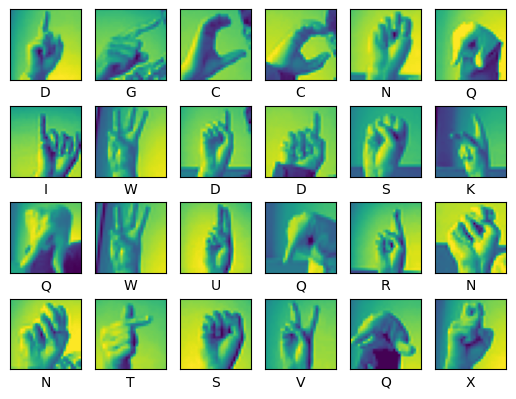

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_train[i].reshape(28, 28))
    axi.set(xticks=[], yticks=[],
            xlabel=(Label_names[y_train[i]]))

plt.show()


In [6]:
# Convert the labels to categorical
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

# Define the model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(24, activation='softmax'))

model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=["accuracy"])


In [24]:
history = model.fit( train_images.drop('label', axis=1),y_train,validation_split=.2,epochs=20, batch_size=128)

Epoch 1/20
172/172 [==============================] - 2s 6ms/step - loss: 28.5998 - accuracy: 0.1693 - val_loss: 5.1072 - val_accuracy: 0.2229
Epoch 2/20
172/172 [==============================] - 1s 6ms/step - loss: 3.0486 - accuracy: 0.3716 - val_loss: 2.1188 - val_accuracy: 0.4653
Epoch 3/20
172/172 [==============================] - 1s 6ms/step - loss: 1.8122 - accuracy: 0.5279 - val_loss: 1.4671 - val_accuracy: 0.6074
Epoch 4/20
172/172 [==============================] - 1s 5ms/step - loss: 1.1986 - accuracy: 0.6464 - val_loss: 0.9962 - val_accuracy: 0.6944
Epoch 5/20
172/172 [==============================] - 1s 6ms/step - loss: 0.8492 - accuracy: 0.7352 - val_loss: 0.5898 - val_accuracy: 0.8110
Epoch 6/20
172/172 [==============================] - 1s 5ms/step - loss: 0.7263 - accuracy: 0.7715 - val_loss: 0.5555 - val_accuracy: 0.8157
Epoch 7/20
172/172 [==============================] - 1s 6ms/step - loss: 0.5387 - accuracy: 0.8243 - val_loss: 0.3718 - val_accuracy: 0.8807
Epoch

In [45]:
score = model.evaluate(test_images.drop('label', axis=1), y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.3588122129440308
Test accuracy: 0.5798940062522888


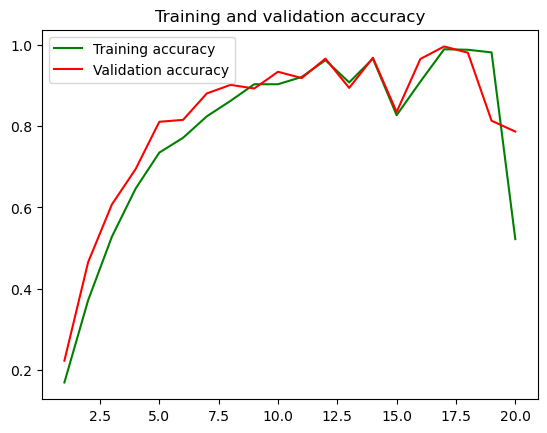

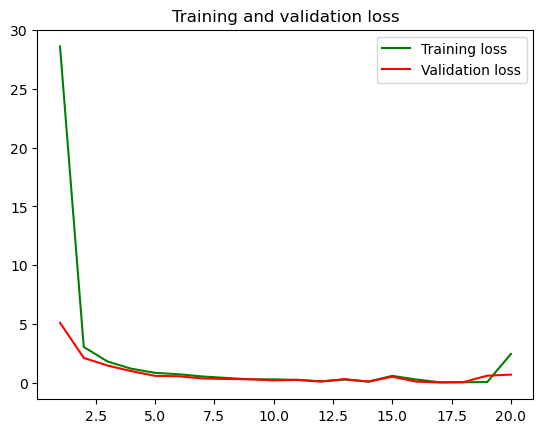

In [25]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "g", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "g", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [50]:
import keras
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=3,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]

In [51]:
# Define the model
model_2 = Sequential()
model_2.add(Dense(512, activation='relu', input_shape=(784,)))
model_2.add(Dense(256, activation='relu'))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(24, activation='softmax'))

model_2.compile(optimizer="Adagrad",
              loss='categorical_crossentropy',
              metrics=["accuracy"])


In [52]:
history_2 = model_2.fit( train_images.drop('label', axis=1),y_train,validation_split=.2,callbacks=callbacks_list,epochs=20, batch_size=256)

Epoch 1/20
86/86 [==============================] - 1s 8ms/step - loss: 33.9533 - accuracy: 0.0983 - val_loss: 7.0531 - val_accuracy: 0.1699
Epoch 2/20
86/86 [==============================] - 1s 8ms/step - loss: 5.8952 - accuracy: 0.2228 - val_loss: 4.1215 - val_accuracy: 0.3003
Epoch 3/20
86/86 [==============================] - 1s 7ms/step - loss: 3.8960 - accuracy: 0.3169 - val_loss: 3.0575 - val_accuracy: 0.3817
Epoch 4/20
86/86 [==============================] - 1s 8ms/step - loss: 3.0987 - accuracy: 0.3880 - val_loss: 2.6171 - val_accuracy: 0.4380
Epoch 5/20
86/86 [==============================] - 1s 8ms/step - loss: 2.4922 - accuracy: 0.4541 - val_loss: 2.1267 - val_accuracy: 0.4963
Epoch 6/20
86/86 [==============================] - 1s 7ms/step - loss: 2.1579 - accuracy: 0.5025 - val_loss: 1.8574 - val_accuracy: 0.5409
Epoch 7/20
86/86 [==============================] - 1s 7ms/step - loss: 1.8382 - accuracy: 0.5508 - val_loss: 1.6284 - val_accuracy: 0.5738
Epoch 8/20
86/86 [=

In [53]:
score = model_2.evaluate(test_images.drop('label', axis=1), y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.4871280193328857
Test accuracy: 0.4743446707725525


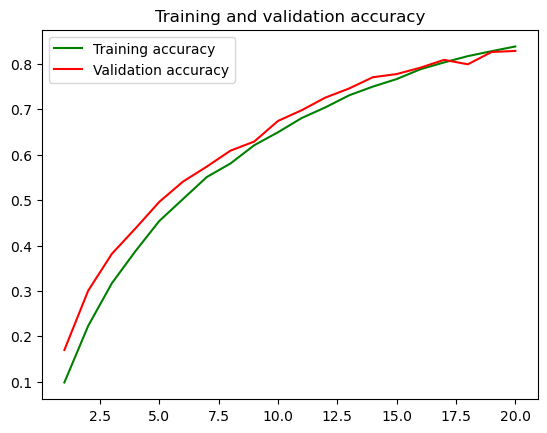

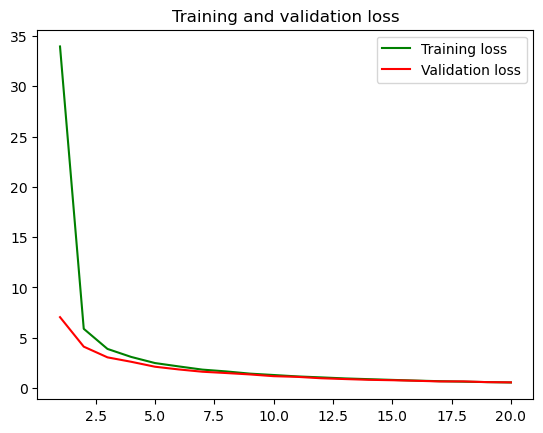

In [54]:
import matplotlib.pyplot as plt
acc = history_2.history["accuracy"]
val_acc = history_2.history["val_accuracy"]
loss = history_2.history["loss"]
val_loss = history_2.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "g", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "g", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [72]:
# Define the model
model_3 = Sequential()
model_3.add(Dense(512, activation='relu', input_shape=(784,)))
model_3.add(Dense(256, activation='relu'))
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(24, activation='softmax'))

model_3.compile(optimizer="Adamax",
              loss='categorical_crossentropy',
              metrics=["accuracy"])


In [73]:
history_3 = model_3.fit( train_images.drop('label', axis=1),y_train,validation_split=.25,callbacks=callbacks_list,epochs=15, batch_size=210)

Epoch 1/15
99/99 [==============================] - 1s 9ms/step - loss: 37.3126 - accuracy: 0.0912 - val_loss: 9.5019 - val_accuracy: 0.1368
Epoch 2/15
99/99 [==============================] - 1s 8ms/step - loss: 5.9276 - accuracy: 0.2385 - val_loss: 5.7528 - val_accuracy: 0.2506
Epoch 3/15
99/99 [==============================] - 1s 8ms/step - loss: 4.0316 - accuracy: 0.3502 - val_loss: 3.9741 - val_accuracy: 0.3610
Epoch 4/15
99/99 [==============================] - 1s 8ms/step - loss: 3.0433 - accuracy: 0.4254 - val_loss: 3.5265 - val_accuracy: 0.3877
Epoch 5/15
99/99 [==============================] - 1s 7ms/step - loss: 2.4200 - accuracy: 0.4929 - val_loss: 2.2882 - val_accuracy: 0.4800
Epoch 6/15
99/99 [==============================] - 1s 8ms/step - loss: 1.9374 - accuracy: 0.5504 - val_loss: 1.7350 - val_accuracy: 0.5758
Epoch 7/15
99/99 [==============================] - 1s 8ms/step - loss: 1.6147 - accuracy: 0.6004 - val_loss: 2.5788 - val_accuracy: 0.4767
Epoch 8/15
99/99 [=

In [74]:
score = model_3.evaluate(test_images.drop('label', axis=1), y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 3.300562858581543
Test accuracy: 0.47713330388069153


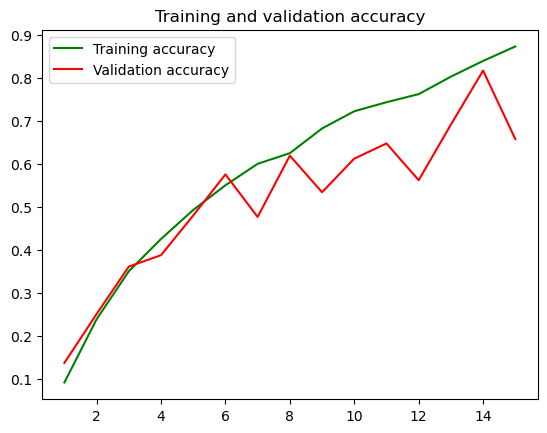

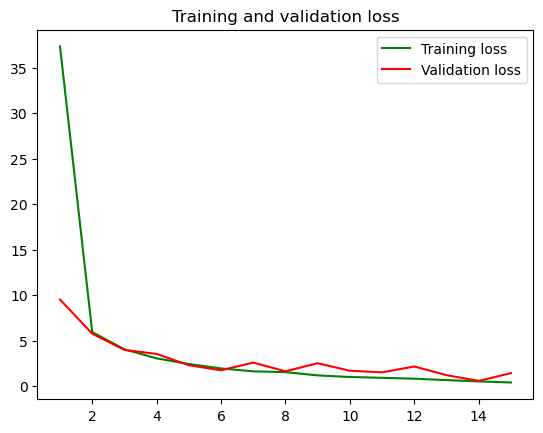

In [75]:
import matplotlib.pyplot as plt
acc = history_3.history["accuracy"]
val_acc = history_3.history["val_accuracy"]
loss = history_3.history["loss"]
val_loss = history_3.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "g", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "g", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

# CNN without Data Augmentation

In [80]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
# Experiment with hyperparameters
num_filters = 32
filter_size = (3, 3)
pool_size = (2, 2)
dropout_rate = 0.25
dense_layer_size = 128
batch_size = 128
epochs = 20

# Build the model
model = Sequential()
model.add(Conv2D(num_filters, kernel_size=filter_size, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(num_filters, kernel_size=filter_size, activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(dropout_rate))
model.add(Flatten())
model.add(Dense(dense_layer_size, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(24, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=.25, callbacks=[EarlyStopping(patience=3)])



Epoch 1/20
161/161 [==============================] - 9s 54ms/step - loss: 1.4607 - accuracy: 0.5728 - val_loss: 0.2871 - val_accuracy: 0.9340
Epoch 2/20
161/161 [==============================] - 11s 70ms/step - loss: 0.2683 - accuracy: 0.9193 - val_loss: 0.0383 - val_accuracy: 0.9983
Epoch 3/20
161/161 [==============================] - 12s 72ms/step - loss: 0.0979 - accuracy: 0.9736 - val_loss: 0.0119 - val_accuracy: 0.9999
Epoch 4/20
161/161 [==============================] - 12s 72ms/step - loss: 0.0493 - accuracy: 0.9876 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 5/20
161/161 [==============================] - 12s 73ms/step - loss: 0.0324 - accuracy: 0.9916 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 6/20
161/161 [==============================] - 11s 71ms/step - loss: 0.0243 - accuracy: 0.9935 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 7/20
161/161 [==============================] - 11s 70ms/step - loss: 0.0189 - accuracy: 0.9954 - val_loss: 5.4257e-04 - val_accura

In [82]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6292381882667542
Test accuracy: 0.8915225863456726


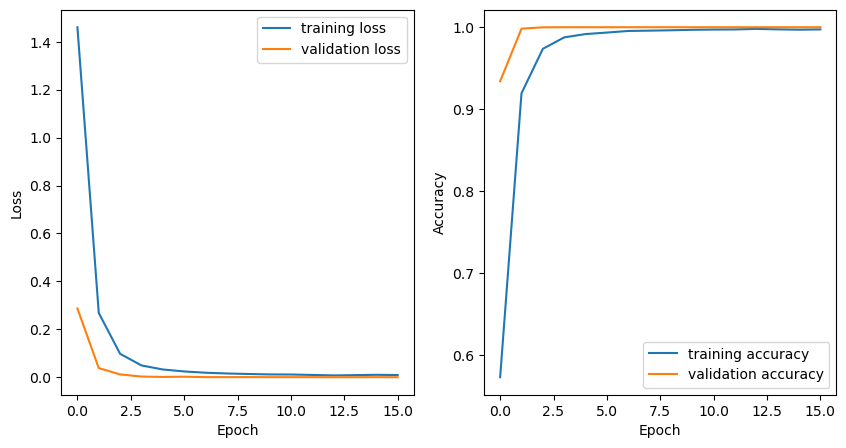

In [83]:
# Plot the learning curves
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(history.history['loss'], label='training loss')
ax[0].plot(history.history['val_loss'], label='validation loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'], label='training accuracy')
ax[1].plot(history.history['val_accuracy'], label='validation accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.show()

In [85]:
# Experiment with hyperparameters
num_filters = 56
filter_size = (3, 3)
dropout_rate = 0.25
dense_layer_size = 128
batch_size = 256
epochs = 20

# Build the model
model_2 = Sequential()
model_2.add(Conv2D(num_filters, kernel_size=filter_size, activation='relu', input_shape=(28, 28, 1)))
model_2.add(Conv2D(num_filters, kernel_size=filter_size, activation='relu'))
model_2.add(Dropout(dropout_rate))
model_2.add(Flatten())
model_2.add(Dense(dense_layer_size, activation='relu'))
model_2.add(Dropout(dropout_rate))
model_2.add(Dense(24, activation='softmax'))

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_2= model_2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=.25, callbacks=[EarlyStopping(patience=3)])



Epoch 1/20
81/81 [==============================] - 26s 316ms/step - loss: 2.0644 - accuracy: 0.4043 - val_loss: 0.7042 - val_accuracy: 0.8333
Epoch 2/20
81/81 [==============================] - 27s 337ms/step - loss: 0.5329 - accuracy: 0.8400 - val_loss: 0.1128 - val_accuracy: 0.9876
Epoch 3/20
81/81 [==============================] - 28s 344ms/step - loss: 0.1667 - accuracy: 0.9539 - val_loss: 0.0188 - val_accuracy: 0.9997
Epoch 4/20
81/81 [==============================] - 27s 333ms/step - loss: 0.0767 - accuracy: 0.9806 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 5/20
81/81 [==============================] - 27s 329ms/step - loss: 0.0476 - accuracy: 0.9882 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 6/20
81/81 [==============================] - 27s 331ms/step - loss: 0.0340 - accuracy: 0.9914 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 7/20
81/81 [==============================] - 27s 334ms/step - loss: 0.0265 - accuracy: 0.9933 - val_loss: 0.0013 - val_accuracy: 1.0000

In [86]:
# Evaluate the model
score = model_2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2771360874176025
Test accuracy: 0.7975460290908813


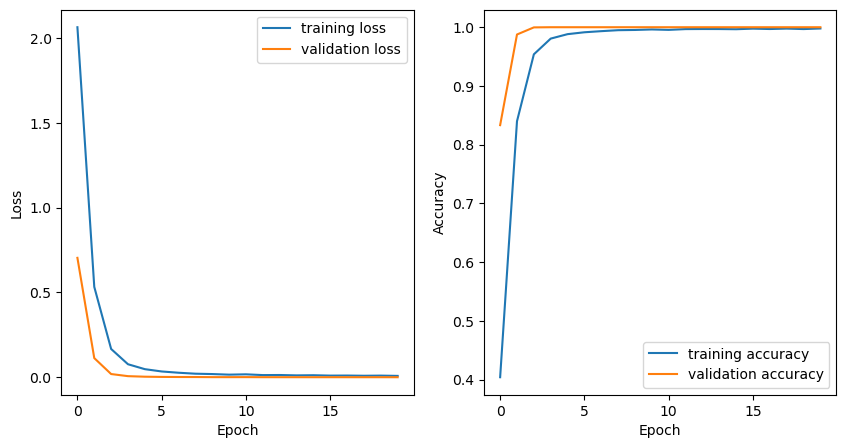

In [87]:
# Plot the learning curves
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(history_2.history['loss'], label='training loss')
ax[0].plot(history_2.history['val_loss'], label='validation loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(history_2.history['accuracy'], label='training accuracy')
ax[1].plot(history_2.history['val_accuracy'], label='validation accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.show()

# CNN with Augmentation

In [88]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=False)  # Don't randomly flip images vertically

datagen.fit(X_train)

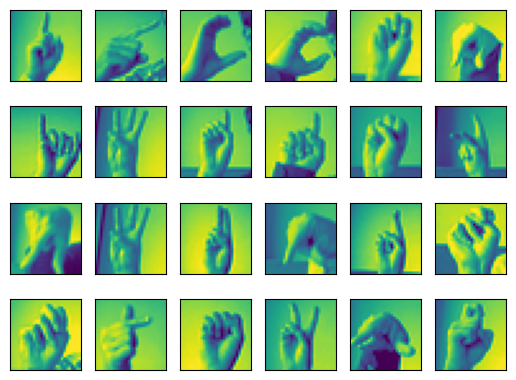

In [92]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_train[i].reshape(28, 28))
    axi.set(xticks=[], yticks=[])

plt.show()


In [94]:
num_filters = 32
filter_size = (3, 3)
pool_size = (2, 2)
dropout_rate = 0.25
dense_layer_size = 128
batch_size = 128
epochs = 20

# Build the model_CD
model_CD= Sequential()
model_CD.add(Conv2D(num_filters, kernel_size=filter_size, activation='relu', input_shape=(28, 28, 1)))
model_CD.add(Conv2D(num_filters, kernel_size=filter_size, activation='relu'))
model_CD.add(MaxPooling2D(pool_size=pool_size))
model_CD.add(Dropout(dropout_rate))
model_CD.add(Flatten())
model_CD.add(Dense(dense_layer_size, activation='relu'))
model_CD.add(Dropout(dropout_rate))
model_CD.add(Dense(24, activation='softmax'))

model_CD.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [102]:
H_CD= model_CD.fit(datagen.flow(X_train,y_train, batch_size=32), # Default batch_size is 32. We set it here for clarity.
          epochs=20,
          steps_per_epoch=128, # Run same number of steps we would if we were not using a generator.
          validation_data=(X_test, y_test))

Epoch 1/20
128/128 [==============================] - 4s 28ms/step - loss: 0.5881 - accuracy: 0.8064 - val_loss: 0.2918 - val_accuracy: 0.9110
Epoch 2/20
128/128 [==============================] - 4s 29ms/step - loss: 0.5735 - accuracy: 0.8071 - val_loss: 0.2540 - val_accuracy: 0.9261
Epoch 3/20
128/128 [==============================] - 4s 30ms/step - loss: 0.5623 - accuracy: 0.8129 - val_loss: 0.2366 - val_accuracy: 0.9176
Epoch 4/20
128/128 [==============================] - 4s 31ms/step - loss: 0.5453 - accuracy: 0.8174 - val_loss: 0.2358 - val_accuracy: 0.9204
Epoch 5/20
128/128 [==============================] - 4s 30ms/step - loss: 0.5291 - accuracy: 0.8220 - val_loss: 0.2415 - val_accuracy: 0.9137
Epoch 6/20
128/128 [==============================] - 4s 29ms/step - loss: 0.5369 - accuracy: 0.8171 - val_loss: 0.2159 - val_accuracy: 0.9336
Epoch 7/20
128/128 [==============================] - 4s 30ms/step - loss: 0.5457 - accuracy: 0.8117 - val_loss: 0.2310 - val_accuracy: 0.9229

In [110]:
# Evaluate the model
score = model_CD.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.14935366809368134
Test accuracy: 0.9438092708587646


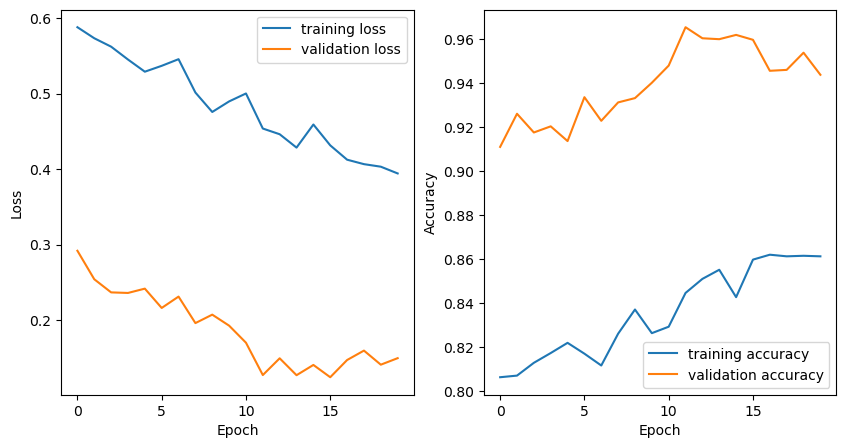

In [104]:
# Plot the learning curves
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(H_CD.history['loss'], label='training loss')
ax[0].plot(H_CD.history['val_loss'], label='validation loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(H_CD.history['accuracy'], label='training accuracy')
ax[1].plot(H_CD.history['val_accuracy'], label='validation accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.show()

In [106]:
num_filters = 32
filter_size = (3, 3)
pool_size = (2, 2)
dropout_rate = 0.25
dense_layer_size = 128
batch_size = 128
epochs = 20

# Build the model_CD
model_CDM= Sequential()
model_CDM.add(Conv2D(num_filters, kernel_size=filter_size, activation='relu', input_shape=(28, 28, 1)))
model_CDM.add(Conv2D(num_filters, kernel_size=filter_size, activation='relu'))
model_CDM.add(Conv2D(num_filters, kernel_size=filter_size, activation='relu'))
model_CDM.add(Dropout(dropout_rate))
model_CDM.add(Flatten())
model_CDM.add(Dense(dense_layer_size, activation='relu'))
model_CDM.add(Dropout(dropout_rate))
model_CDM.add(Dense(24, activation='softmax'))

model_CDM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [107]:
H_CDM= model_CDM.fit(datagen.flow(X_train,y_train, batch_size=32), # Default batch_size is 32. We set it here for clarity.
          epochs=20,
          steps_per_epoch=128, # Run same number of steps we would if we were not using a generator.
          validation_data=(X_test, y_test))

Epoch 1/20
128/128 [==============================] - 8s 58ms/step - loss: 3.0977 - accuracy: 0.0759 - val_loss: 2.7272 - val_accuracy: 0.1631
Epoch 2/20
128/128 [==============================] - 7s 57ms/step - loss: 2.5049 - accuracy: 0.2319 - val_loss: 1.8551 - val_accuracy: 0.4545
Epoch 3/20
128/128 [==============================] - 7s 57ms/step - loss: 2.0138 - accuracy: 0.3728 - val_loss: 1.3154 - val_accuracy: 0.5800
Epoch 4/20
128/128 [==============================] - 8s 60ms/step - loss: 1.6234 - accuracy: 0.4680 - val_loss: 1.0484 - val_accuracy: 0.6601
Epoch 5/20
128/128 [==============================] - 7s 57ms/step - loss: 1.3915 - accuracy: 0.5405 - val_loss: 0.8560 - val_accuracy: 0.7253
Epoch 6/20
128/128 [==============================] - 8s 59ms/step - loss: 1.2346 - accuracy: 0.5827 - val_loss: 0.7301 - val_accuracy: 0.7617
Epoch 7/20
128/128 [==============================] - 8s 59ms/step - loss: 1.1996 - accuracy: 0.5984 - val_loss: 0.6897 - val_accuracy: 0.7475

In [108]:
# Evaluate the model
score = model_CDM.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.26240503787994385
Test accuracy: 0.9235917329788208


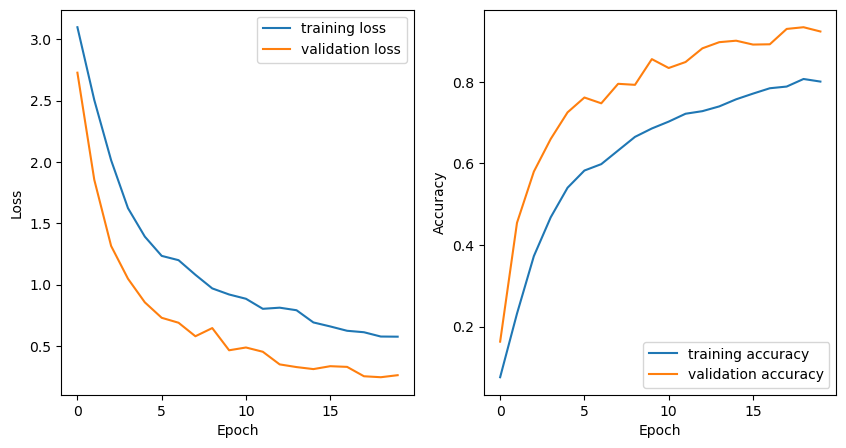

In [109]:
# Plot the learning curves
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(H_CDM.history['loss'], label='training loss')
ax[0].plot(H_CDM.history['val_loss'], label='validation loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(H_CDM.history['accuracy'], label='training accuracy')
ax[1].plot(H_CDM.history['val_accuracy'], label='validation accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.show()